In [ ]:
%pip install pillow


     ---------------------------------------- 2.6/2.6 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\dinit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = r"Brain Tumor Data Set\brain_tumor_dataset\train\healthy"
train_files_tumor = r"Brain Tumor Data Set\brain_tumor_dataset\train\tumor"

valid_files_healthy = r"Brain Tumor Data Set\brain_tumor_dataset\valid\healthy"
valid_files_tumor = r"Brain Tumor Data Set\brain_tumor_dataset\valid\tumor"





test_files_healthy = r"Brain Tumor Data Set\brain_tumor_dataset\test\healthy"
test_files_tumor= r"Brain Tumor Data Set\brain_tumor_dataset\test\tumor"




print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_tumor))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_tumor))


print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_tumor))

Number of healthy leaf images in training set 1460
Number of powder leaf images in training set 1759
Number of healthy leaf images in test set 314
Number of powder leaf images in test set 377
Number of healthy leaf images in validation set 313
Number of powder leaf images in validation set 377


In [ ]:
%pip install 

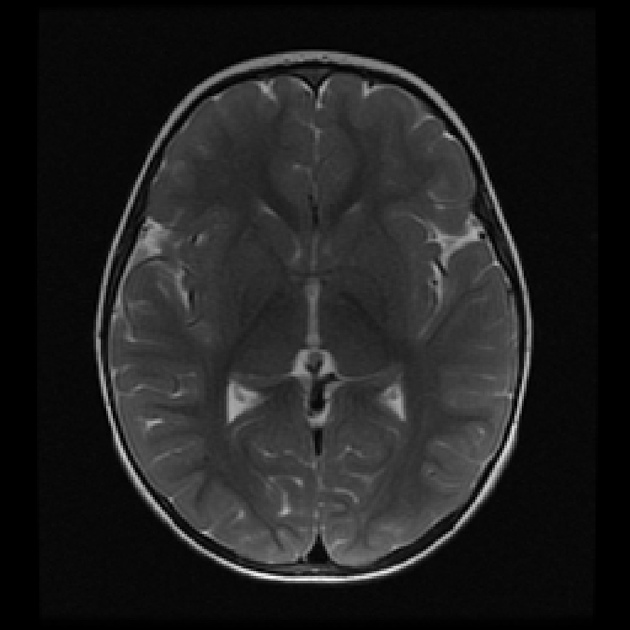

In [6]:
from PIL import Image
import IPython.display as display

image_path = r'Brain Tumor Data Set\brain_tumor_dataset\train\healthy\Not Cancer  (2).jpeg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

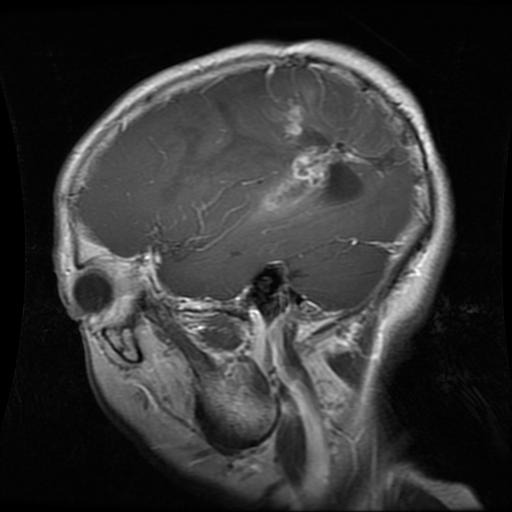

In [7]:
from PIL import Image
import IPython.display as display

image_path = r'Brain Tumor Data Set\brain_tumor_dataset\train\tumor\Cancer (2).jpg'


with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [9]:
%pip install tensorflow


     ------------------------------------ 390.0/390.0 MB 881.7 kB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB 2.0 MB/s eta 0:00:00
     -------------------------------------- 434.5/434.5 KB 2.7 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 KB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 15.9/15.9 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 1.5 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 KB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 KB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\dinit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_generator = train_datagen.flow_from_directory(
    'Brain Tumor Data Set/brain_tumor_dataset/train',
    target_size=(224, 224),  # Prefer 224x224 for standard CNNs
    batch_size=16,
    class_mode='binary',
    shuffle=True  # Ensure randomization
)

validation_generator = test_datagen.flow_from_directory(
    'Brain Tumor Data Set/brain_tumor_dataset/valid',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=False  # Keep validation order fixed
)


Found 3219 images belonging to 2 classes.
Found 690 images belonging to 2 classes.


In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the improved CNN model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(BatchNormalization())  # Normalize activations
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3 (NEW)
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))  # Increased neurons
model.add(Dropout(0.5))  # Helps prevent overfitting

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,828,033 (37.49 MB)

 Trainable params: 9,827,073 (37.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [42]:
%pip install scipy

You should consider upgrading via the 'c:\Users\dinit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [43]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 1145s 6s/step - accuracy: 0.6458 - loss: 4.2052 - val_accuracy: 0.4072 - val_loss: 4.8621 - learning_rate: 0.0010
Epoch 2/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.6972 - loss: 0.6009 - val_accuracy: 0.5797 - val_loss: 1.0825 - learning_rate: 0.0010
Epoch 3/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.7614 - loss: 0.4987 - val_accuracy: 0.6681 - val_loss: 0.9776 - learning_rate: 0.0010
Epoch 4/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.7573 - loss: 0.4897 - val_accuracy: 0.7957 - val_loss: 0.4024 - learning_rate: 0.0010
Epoch 5/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.7501 - loss: 0.5231 - val_accuracy: 0.6377 - val_loss: 0.8922 - learning_rate: 0.0010
Epoch 6/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.8051 - loss: 0.4257 - val_accuracy: 0.7406 - val_loss: 0.7632 - learning_rate: 0.0010
Epoch 7/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.7914 - loss: 0

In [45]:
%pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 497.3 kB/s eta 0:00:00
     -------------------------------------- 71.9/71.9 KB 994.3 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 483.3 kB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
     ------------------------------------ 218.6/218.6 KB 738.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\dinit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [47]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     -------------------------------------- 11.6/11.6 MB 518.7 kB/s eta 0:00:00
     ------------------------------------ 507.9/507.9 KB 776.4 kB/s eta 0:00:00
     ------------------------------------ 346.8/346.8 KB 653.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\dinit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


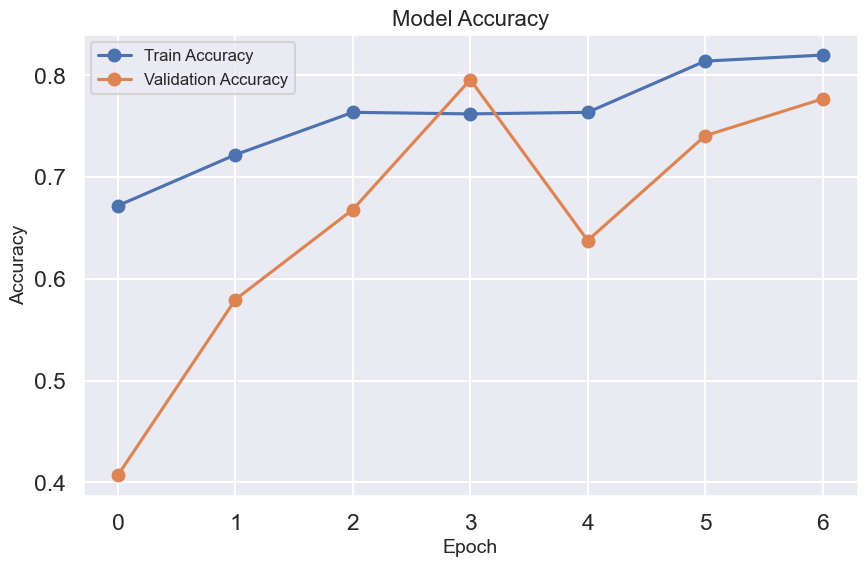

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_context("talk")  # Better for readability

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(history.history['accuracy'], marker='o', linestyle='-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', linestyle='-', label='Validation Accuracy')

plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)  # Add grid for better visibility

plt.show()


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\dinit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step


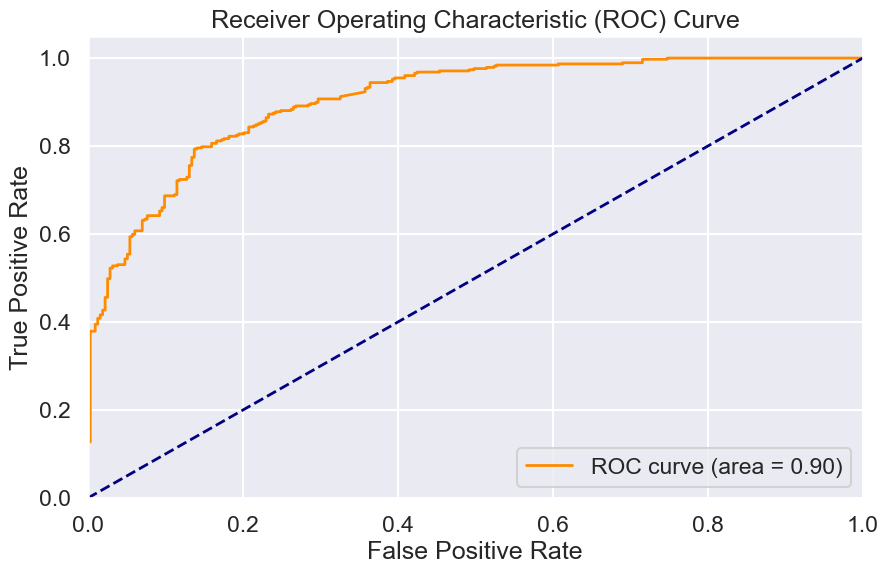

In [51]:
%pip install scikit-learn

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Get the true labels and predicted probabilities
y_true = validation_generator.classes
y_pred = model.predict(validation_generator).ravel()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step


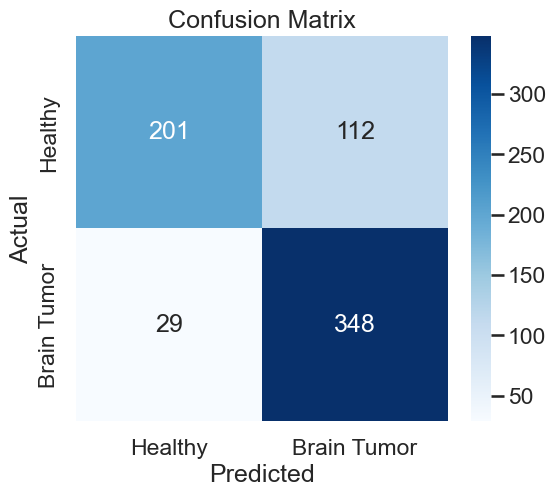

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the ground truth labels from the validation generator
y_true = validation_generator.classes  

# Get model predictions
y_pred_prob = model.predict(validation_generator)  # Probabilities
y_pred = np.round(y_pred_prob).astype(int)  # Convert to binary labels (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Healthy', 'Brain Tumor'], yticklabels=['Healthy', 'Brain Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [54]:
model.save("brain_tumor_detection_model.h5")


In [74]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load the trained model
model = load_model("brain_tumor_detection_model.h5")

# Function to preprocess the image using PIL
def preprocess_image(img_path, target_size=(224, 224)):  # Change size if needed
    img = Image.open(img_path)  # Open the image using PIL
    img = img.resize(target_size)  # Resize to match model input
    img = img.convert("RGB")  # Ensure it's in RGB mode
    img_array = np.array(img) / 255.0  # Convert to array & normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch
    return img_array

# Example: Predict on a new image
img_path = "test_img.jpg"  # Change this to your image path
input_img = preprocess_image(img_path)


In [75]:
# Make prediction
prediction = model.predict(input_img)

# Assuming binary classification (0 = Healthy, 1 = Brain Tumor)
predicted_class = "Brain Tumor" if prediction[0][0] > 0.5 else "Healthy"

print(f"Prediction: {predicted_class} (Confidence: {prediction[0][0]:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
Prediction: Healthy (Confidence: 0.03)
